## Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [88]:
import h5py
import numpy as np

### Load the data

In [89]:
def load_dataset():
    fn = 'data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn ='data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((Y_train.shape[0],))
    Y_test = Y_test.reshape((Y_test.shape[0], ))
    
    return X_train, Y_train, X_test, Y_test, classes

In [90]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

print('X_train.shape=', X_train.shape)
print('Y_train.shape=',  Y_train.shape)
print('X_test.shape=', X_test.shape)
print('Y_test.shape=', Y_test.shape)

X_train.shape= (1080, 64, 64, 3)
Y_train.shape= (1080,)
X_test.shape= (120, 64, 64, 3)
Y_test.shape= (120,)


### Review the data

In [91]:
import matplotlib.pyplot as plt

In [92]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

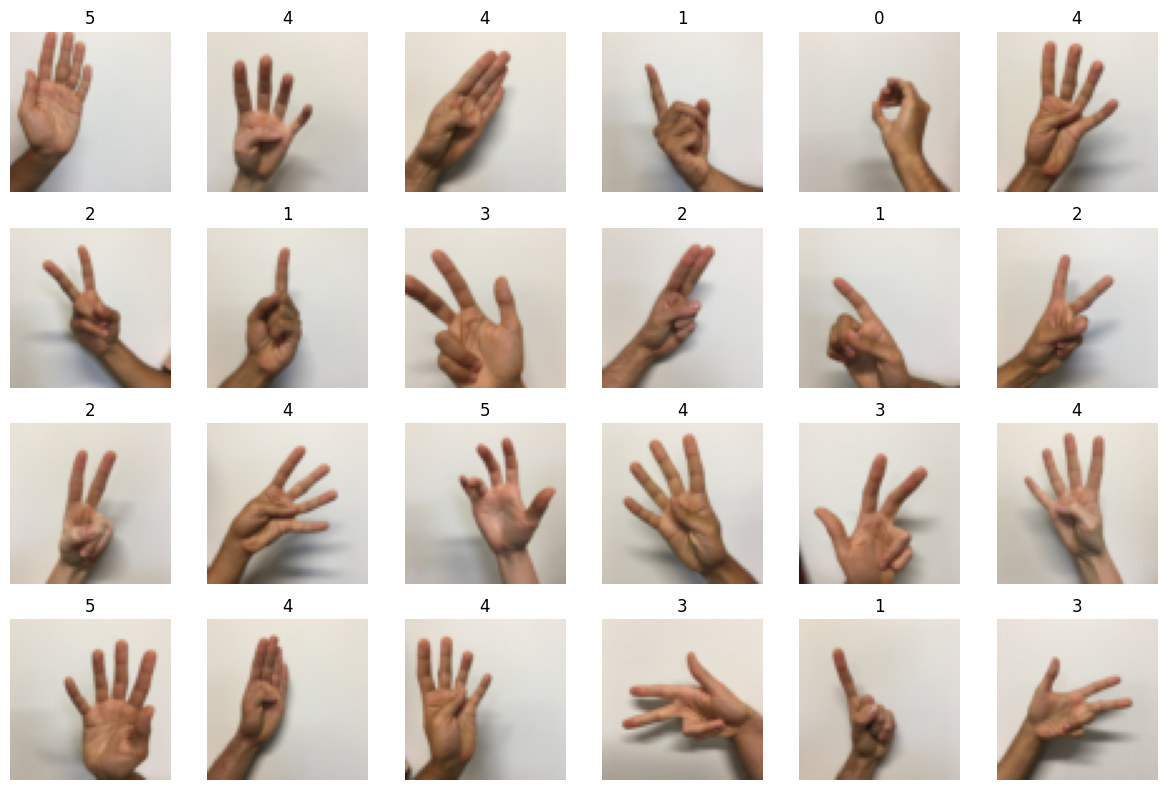

In [93]:
plt.figure(figsize= (12,8))
display_samples_in_grid(X_train, n_rows=4, n_cols=6, y= Y_train.T)
plt.tight_layout(h_pad=1, w_pad=1)

### Process the data

In [94]:
dimData = np.prod(X_train.shape[1:])

In [95]:
X_train = X_train.reshape(X_train.shape[0], dimData)
X_test = X_test.reshape(X_test.shape[0], dimData)

In [96]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
# Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

In [97]:
from keras.utils import to_categorical

In [98]:
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

In [99]:
def Graphic(history):
    # Plot the Loss Curves
    plt.figure(figsize=[8, 6])
    plt.plot(history.history['loss'], 'r', linewidth=3.0)
    plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
    plt.legend(['Training loss', 'Testing Loss'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)

    # Plot the Accuracy Curves
    plt.figure(figsize=[8, 6])
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
    plt.legend(['Training Accuracy', 'Testing Accuracy'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy Curves', fontsize=16)

### Creating the model and training

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

In [129]:
### Example 1
hidden_layers_1_example = 2
activations_1_example = 'relu'
model_1_example = Sequential()
model_1_example.add(Flatten(input_shape=(X_train.shape[1:])))

[model_1_example.add(Dense(512, activation=activations_1_example)) for _ in range(hidden_layers_1_example)]
model_1_example.add(Dense(len(classes), activation='softmax'))
model_1_example.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30


34/34 [==============================] - 5s 127ms/step - loss: 5.2116 - accuracy: 0.1713 - val_loss: 1.7587 - val_accuracy: 0.1750
Epoch 2/30
34/34 [==============================] - 4s 118ms/step - loss: 1.9116 - accuracy: 0.2639 - val_loss: 1.8249 - val_accuracy: 0.1667
Epoch 3/30
34/34 [==============================] - 4s 117ms/step - loss: 1.6906 - accuracy: 0.2981 - val_loss: 1.5756 - val_accuracy: 0.4250
Epoch 4/30
34/34 [==============================] - 4s 127ms/step - loss: 1.4831 - accuracy: 0.4250 - val_loss: 1.4018 - val_accuracy: 0.3750
Epoch 5/30
34/34 [==============================] - 4s 116ms/step - loss: 1.3190 - accuracy: 0.4935 - val_loss: 1.4469 - val_accuracy: 0.4750
Epoch 6/30
34/34 [==============================] - 4s 112ms/step - loss: 1.3168 - accuracy: 0.4713 - val_loss: 1.2600 - val_accuracy: 0.5000
Epoch 7/30
34/34 [==============================] - 4s 114ms/step - loss: 1.1566 - accuracy: 0.5528 - val_loss: 1.2783 - val_accuracy: 0.4000
Epoch 8/30
34/34 

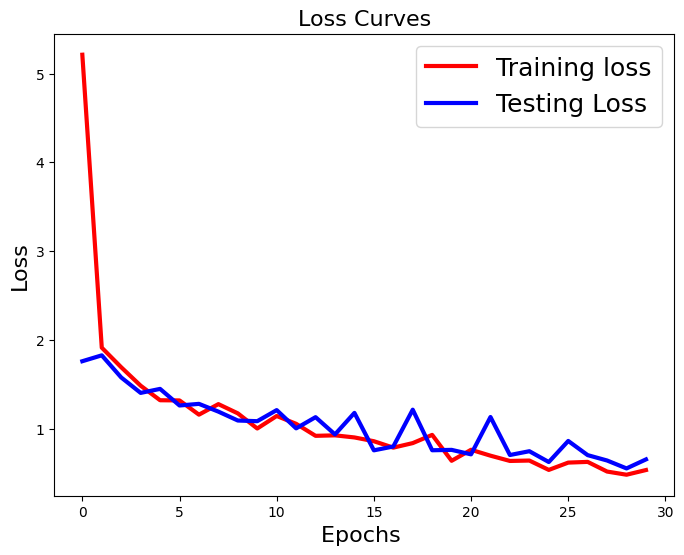

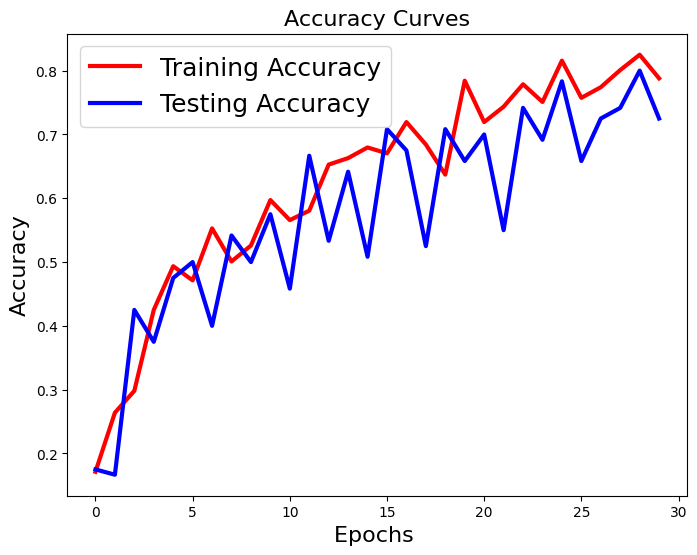

In [130]:
history_1_example = model_1_example.fit(X_train, Y_train_one_hot, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test_one_hot))
    
[test_loss_1_example, test_acc_1_example] = model_1_example.evaluate(X_test, Y_test_one_hot)
print("Evaluate:\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1_example, test_acc_1_example))
Graphic(history_1_example)

In [121]:
### Example 2
hidden_layers_2_example = 5
activations_2_example = 'relu'
model_2_example = Sequential()
model_2_example.add(Flatten(input_shape=(X_train.shape[1:])))

[model_2_example.add(Dense(512, activation=activations_2_example)) for _ in range(hidden_layers_2_example)]
model_2_example.add(Dense(len(classes), activation='softmax'))
model_2_example.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
34/34 [==============================] - 3s 57ms/step - loss: 1.7814 - accuracy: 0.1954 - val_loss: 1.7539 - val_accuracy: 0.2250
Epoch 2/30
34/34 [==============================] - 2s 55ms/step - loss: 1.7569 - accuracy: 0.2222 - val_loss: 1.7641 - val_accuracy: 0.1667
Epoch 3/30
34/34 [==============================] - 1s 40ms/step - loss: 1.7236 - accuracy: 0.2528 - val_loss: 1.8103 - val_accuracy: 0.1750
Epoch 4/30
34/34 [==============================] - 1s 40ms/step - loss: 1.7348 - accuracy: 0.2731 - val_loss: 1.7601 - val_accuracy: 0.1750
Epoch 5/30
34/34 [==============================] - 1s 38ms/step - loss: 1.6742 - accuracy: 0.2824 - val_loss: 1.6421 - val_accuracy: 0.2500
Epoch 6/30
34/34 [==============================] - 1s 38ms/step - loss: 1.6622 - accuracy: 0.3093 - val_loss: 1.7074 - val_accuracy: 0.2667
Epoch 7/30
34/34 [==============================] - 1s 37ms/step - loss: 1.6744 - accuracy: 0.2981 - val_loss: 1.5145 - val_accuracy: 0.4667
Epoch 8/30
34

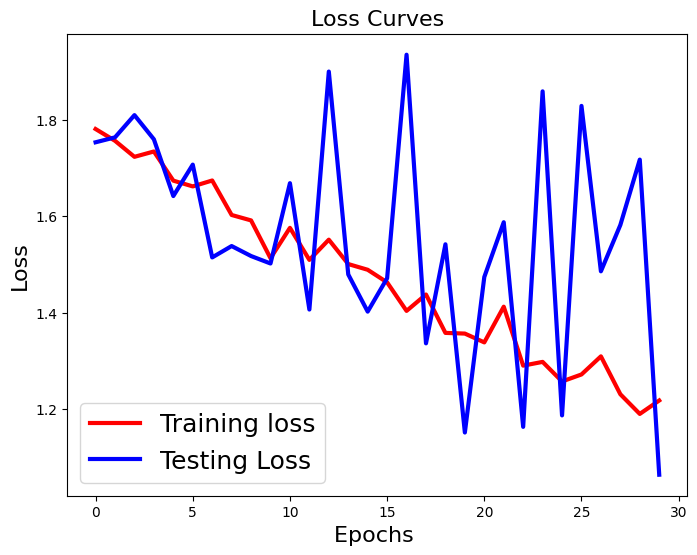

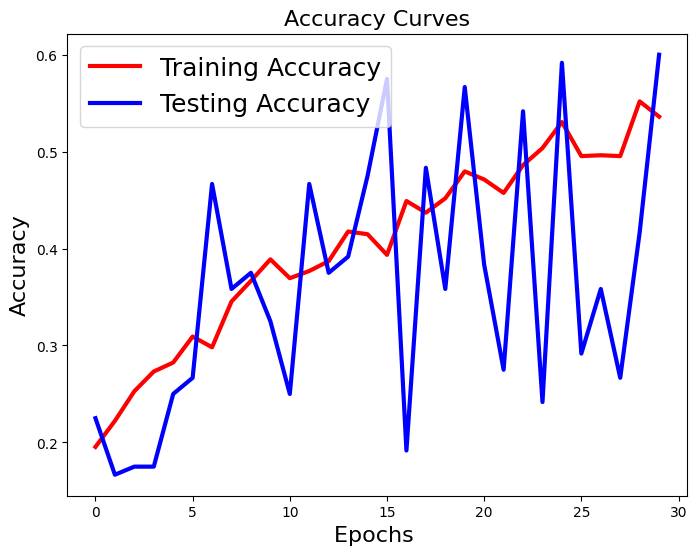

In [122]:
history_2_example = model_2_example.fit(X_train, Y_train_one_hot, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test_one_hot))
    
[test_loss_2_example, test_acc_2_example] = model_2_example.evaluate(X_test, Y_test_one_hot)
print("Evaluate:\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_2_example, test_acc_2_example))
Graphic(history_2_example)

In [131]:
### Example 3
hidden_layers_3_example = 4
activations_3_example = 'tanh'
model_3_example = Sequential()
model_3_example.add(Flatten(input_shape=(X_train.shape[1:])))

[model_3_example.add(Dense(512, activation=activations_3_example)) for _ in range(hidden_layers_3_example)]
model_3_example.add(Dense(len(classes), activation='softmax'))
model_3_example.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
34/34 [==============================] - 6s 115ms/step - loss: 2.2517 - accuracy: 0.1880 - val_loss: 1.8435 - val_accuracy: 0.1667
Epoch 2/30
34/34 [==============================] - 4s 105ms/step - loss: 1.8624 - accuracy: 0.1731 - val_loss: 1.9027 - val_accuracy: 0.1667
Epoch 3/30
34/34 [==============================] - 3s 101ms/step - loss: 1.8636 - accuracy: 0.1620 - val_loss: 1.8568 - val_accuracy: 0.1667
Epoch 4/30
34/34 [==============================] - 3s 98ms/step - loss: 1.8253 - accuracy: 0.1565 - val_loss: 1.8455 - val_accuracy: 0.1667
Epoch 5/30
34/34 [==============================] - 3s 103ms/step - loss: 1.8467 - accuracy: 0.1481 - val_loss: 1.8545 - val_accuracy: 0.1667
Epoch 6/30
34/34 [==============================] - 3s 98ms/step - loss: 1.8368 - accuracy: 0.1648 - val_loss: 1.8124 - val_accuracy: 0.1667
Epoch 7/30
34/34 [==============================] - 3s 103ms/step - loss: 1.8245 - accuracy: 0.1611 - val_loss: 1.8128 - val_accuracy: 0.1667
Epoch 8/

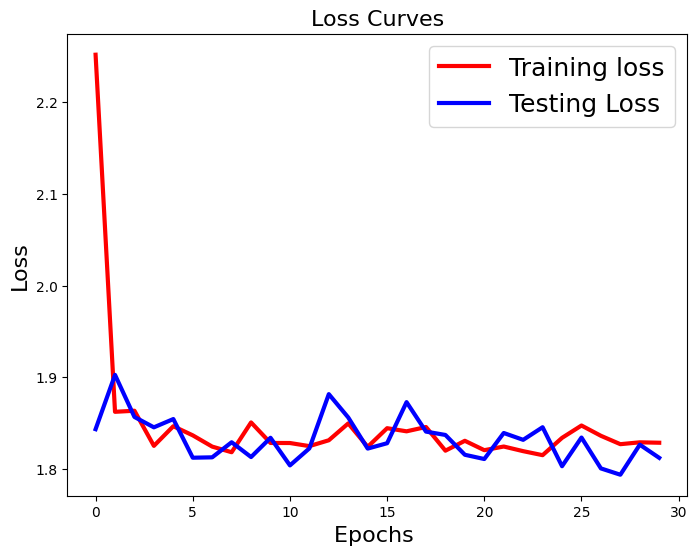

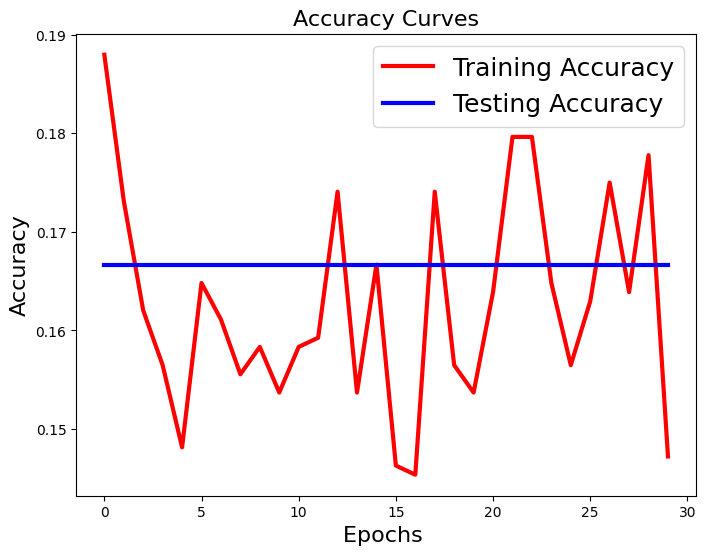

In [132]:
history_3_example = model_3_example.fit(X_train, Y_train_one_hot, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test_one_hot))
    
[test_loss_3_example, test_acc_3_example] = model_3_example.evaluate(X_test, Y_test_one_hot)
print("Evaluate:\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_3_example, test_acc_3_example))
Graphic(history_3_example)

In [126]:
### Example 4
hidden_layers_4_example = 4
activations_4_example = 'sigmoid'
model_4_example = Sequential()
model_4_example.add(Flatten(input_shape=(X_train.shape[1:])))

[model_4_example.add(Dense(512, activation=activations_4_example)) for _ in range(hidden_layers_4_example)]
model_4_example.add(Dense(len(classes), activation='softmax'))
model_4_example.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
34/34 [==============================] - 3s 87ms/step - loss: 1.8169 - accuracy: 0.1815 - val_loss: 1.8075 - val_accuracy: 0.1667
Epoch 2/30
34/34 [==============================] - 3s 81ms/step - loss: 1.8120 - accuracy: 0.1898 - val_loss: 1.8065 - val_accuracy: 0.1667
Epoch 3/30
34/34 [==============================] - 3s 81ms/step - loss: 1.8117 - accuracy: 0.1602 - val_loss: 1.8448 - val_accuracy: 0.1667
Epoch 4/30
34/34 [==============================] - 3s 79ms/step - loss: 1.8032 - accuracy: 0.1954 - val_loss: 2.0277 - val_accuracy: 0.1667
Epoch 5/30
34/34 [==============================] - 3s 95ms/step - loss: 1.8178 - accuracy: 0.2009 - val_loss: 1.8746 - val_accuracy: 0.1667
Epoch 6/30
34/34 [==============================] - 3s 94ms/step - loss: 1.8261 - accuracy: 0.1731 - val_loss: 1.8032 - val_accuracy: 0.1667
Epoch 7/30
34/34 [==============================] - 3s 86ms/step - loss: 1.8183 - accuracy: 0.1972 - val_loss: 1.8239 - val_accuracy: 0.1667
Epoch 8/30
34

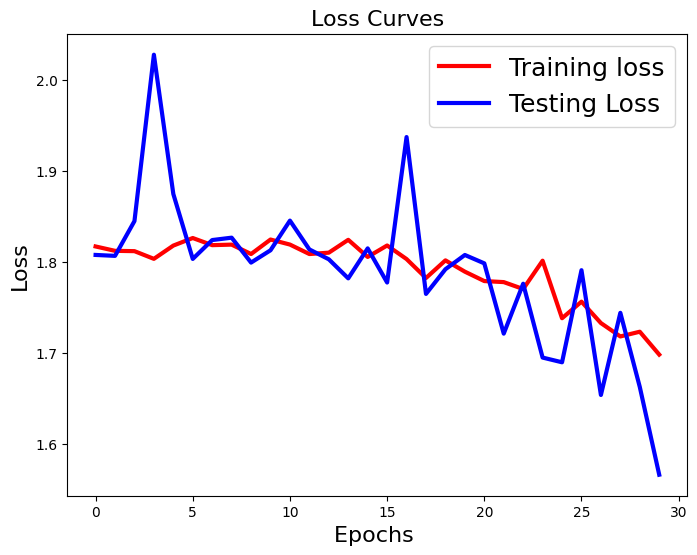

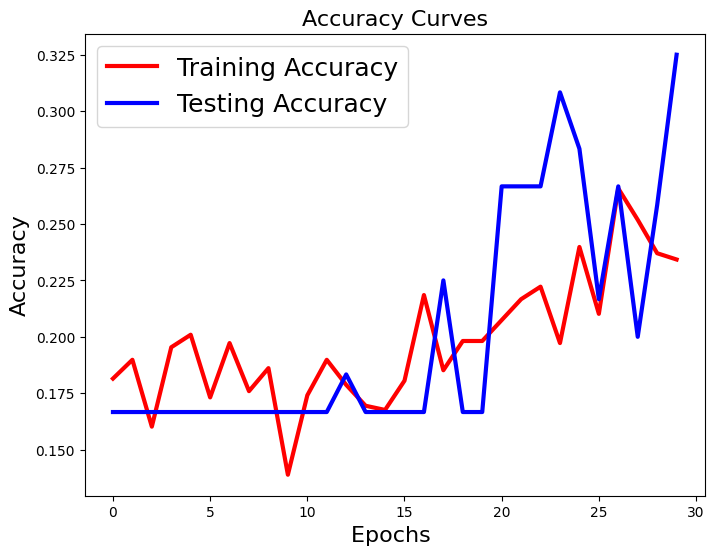

In [125]:
history_4_example = model_4_example.fit(X_train, Y_train_one_hot, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test_one_hot))
    
[test_loss_4_example, test_acc_4_example] = model_4_example.evaluate(X_test, Y_test_one_hot)
print("Evaluate:\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_4_example, test_acc_4_example))
Graphic(history_4_example)

In [127]:
### Example 5
hidden_layers_5_example = 6
activations_5_example = 'relu'
dropout = 0.15

model_5_example = Sequential()
model_5_example.add(Flatten(input_shape=(X_train.shape[1:])))

[model_5_example.add(Dense(512, activation=activations_5_example)) for _ in range(hidden_layers_5_example)]
model_5_example.add(Dropout(dropout))
model_5_example.add(Dense(len(classes), activation='softmax'))
model_5_example.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
34/34 [==============================] - 2s 50ms/step - loss: 1.7918 - accuracy: 0.1824 - val_loss: 1.7686 - val_accuracy: 0.1667
Epoch 2/30
34/34 [==============================] - 1s 38ms/step - loss: 1.7706 - accuracy: 0.2009 - val_loss: 1.7445 - val_accuracy: 0.2833
Epoch 3/30
34/34 [==============================] - 1s 39ms/step - loss: 1.7290 - accuracy: 0.2546 - val_loss: 1.7156 - val_accuracy: 0.2000
Epoch 4/30
34/34 [==============================] - 1s 38ms/step - loss: 1.7038 - accuracy: 0.2787 - val_loss: 1.7611 - val_accuracy: 0.1750
Epoch 5/30
34/34 [==============================] - 1s 37ms/step - loss: 1.7158 - accuracy: 0.2787 - val_loss: 1.6312 - val_accuracy: 0.3000
Epoch 6/30
34/34 [==============================] - 1s 37ms/step - loss: 1.6979 - accuracy: 0.2574 - val_loss: 1.5707 - val_accuracy: 0.4667
Epoch 7/30
34/34 [==============================] - 1s 39ms/step - loss: 1.6599 - accuracy: 0.3130 - val_loss: 1.7031 - val_accuracy: 0.2417
Epoch 8/30
34

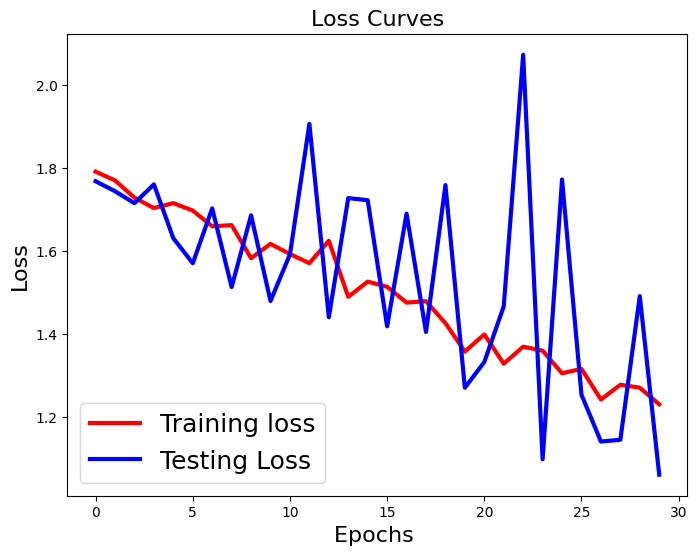

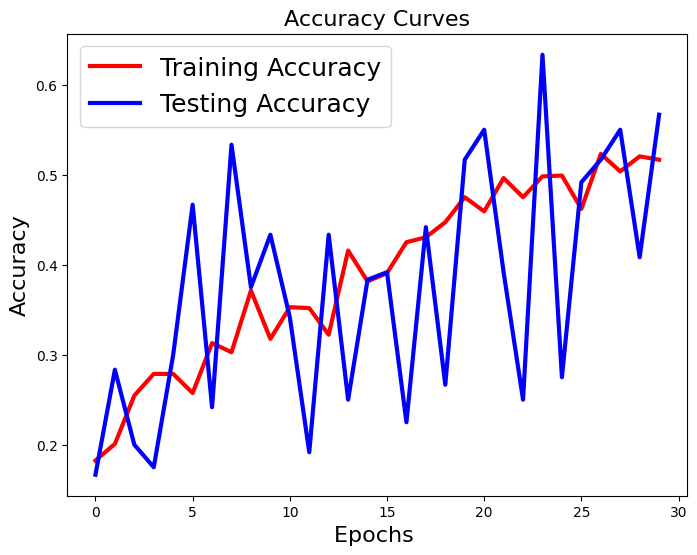

In [128]:
history_5_example = model_5_example.fit(X_train, Y_train_one_hot, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test_one_hot))
    
[test_loss_5_example, test_acc_5_example] = model_5_example.evaluate(X_test, Y_test_one_hot)
print("Evaluate:\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_5_example, test_acc_5_example))
Graphic(history_5_example)